In [1]:
import numpy as np
import torch 
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import time
import sys
import itertools

import pandas as pd

In [2]:
names = {"narea": "Narea", "sla": "SLA", "ps": "PLSR_SLA_Sorghum", "pn": "FS_PLSR_Narea"}

In [14]:
coh_avg_time = 0.196766
seeds = 5
for acq_name in ["EI", "PI", "UCB-0.1", "UCB-0.2", "UCB-0.5", "KG"]:
    for kernel_name in ["matern52", "matern32", "rbf", "matern12", "spectral-10"]:
        for trait in ["pn"]:
            trait = trait.lower()
            #organize timed data into one file
            #_results = [pd.read_csv(f"{base_path}/runs/{trait}/TimeTest/botorchEInew_result_{seed}.npy", encoding='utf-8') for seed in range(seeds)]
            try:
                _results = [pd.read_csv(f"./output/{trait}/botorch{acq_name}_{kernel_name}_result_{seed}.npy", encoding='utf-8') for seed in range(seeds)]
                print(f"./output/{trait}/botorch{acq_name}_{kernel_name}_result_x.npy")
            except Exception:
                print(f"ISSUE: ./output/{trait}/botorch{acq_name}_{kernel_name}_result_x.npy")
                pass
            
#             _results = pd.concat(_results, ignore_index=False)

#             #add time needed calculate co-heritability (using LMER model)
#             _results['Time'] = _results.apply(lambda row : row['Time'] + coh_avg_time * row.name, axis=1) #add lookup time

#             #THIS VERSION OF THE RESULTS HAVE LOOKUP TIMES ADDED TO IT
#             _results = _results.sort_values('Time')
#             #_results.to_csv(f"{base_path}/runs/{trait}/TimeTest/botorchEInew_time.npy", encoding='utf-8') #store botorch search results
#             #_results.to_csv(f"./output/{trait}/botorch{acq_name}_{kernel_name}new_time.npy", encoding='utf-8') #store botorch search results

ISSUE: ./output/pn/botorchEI_matern52_result_x.npy
./output/pn/botorchEI_matern32_result_x.npy
ISSUE: ./output/pn/botorchEI_rbf_result_x.npy
ISSUE: ./output/pn/botorchEI_matern12_result_x.npy
./output/pn/botorchEI_spectral-10_result_x.npy
./output/pn/botorchPI_matern52_result_x.npy
./output/pn/botorchPI_matern32_result_x.npy
./output/pn/botorchPI_rbf_result_x.npy
./output/pn/botorchPI_matern12_result_x.npy
./output/pn/botorchPI_spectral-10_result_x.npy
./output/pn/botorchUCB-0.1_matern52_result_x.npy
./output/pn/botorchUCB-0.1_matern32_result_x.npy
./output/pn/botorchUCB-0.1_rbf_result_x.npy
./output/pn/botorchUCB-0.1_matern12_result_x.npy
./output/pn/botorchUCB-0.1_spectral-10_result_x.npy
./output/pn/botorchUCB-0.2_matern52_result_x.npy
./output/pn/botorchUCB-0.2_matern32_result_x.npy
./output/pn/botorchUCB-0.2_rbf_result_x.npy
./output/pn/botorchUCB-0.2_matern12_result_x.npy
./output/pn/botorchUCB-0.2_spectral-10_result_x.npy
./output/pn/botorchUCB-0.5_matern52_result_x.npy
./output

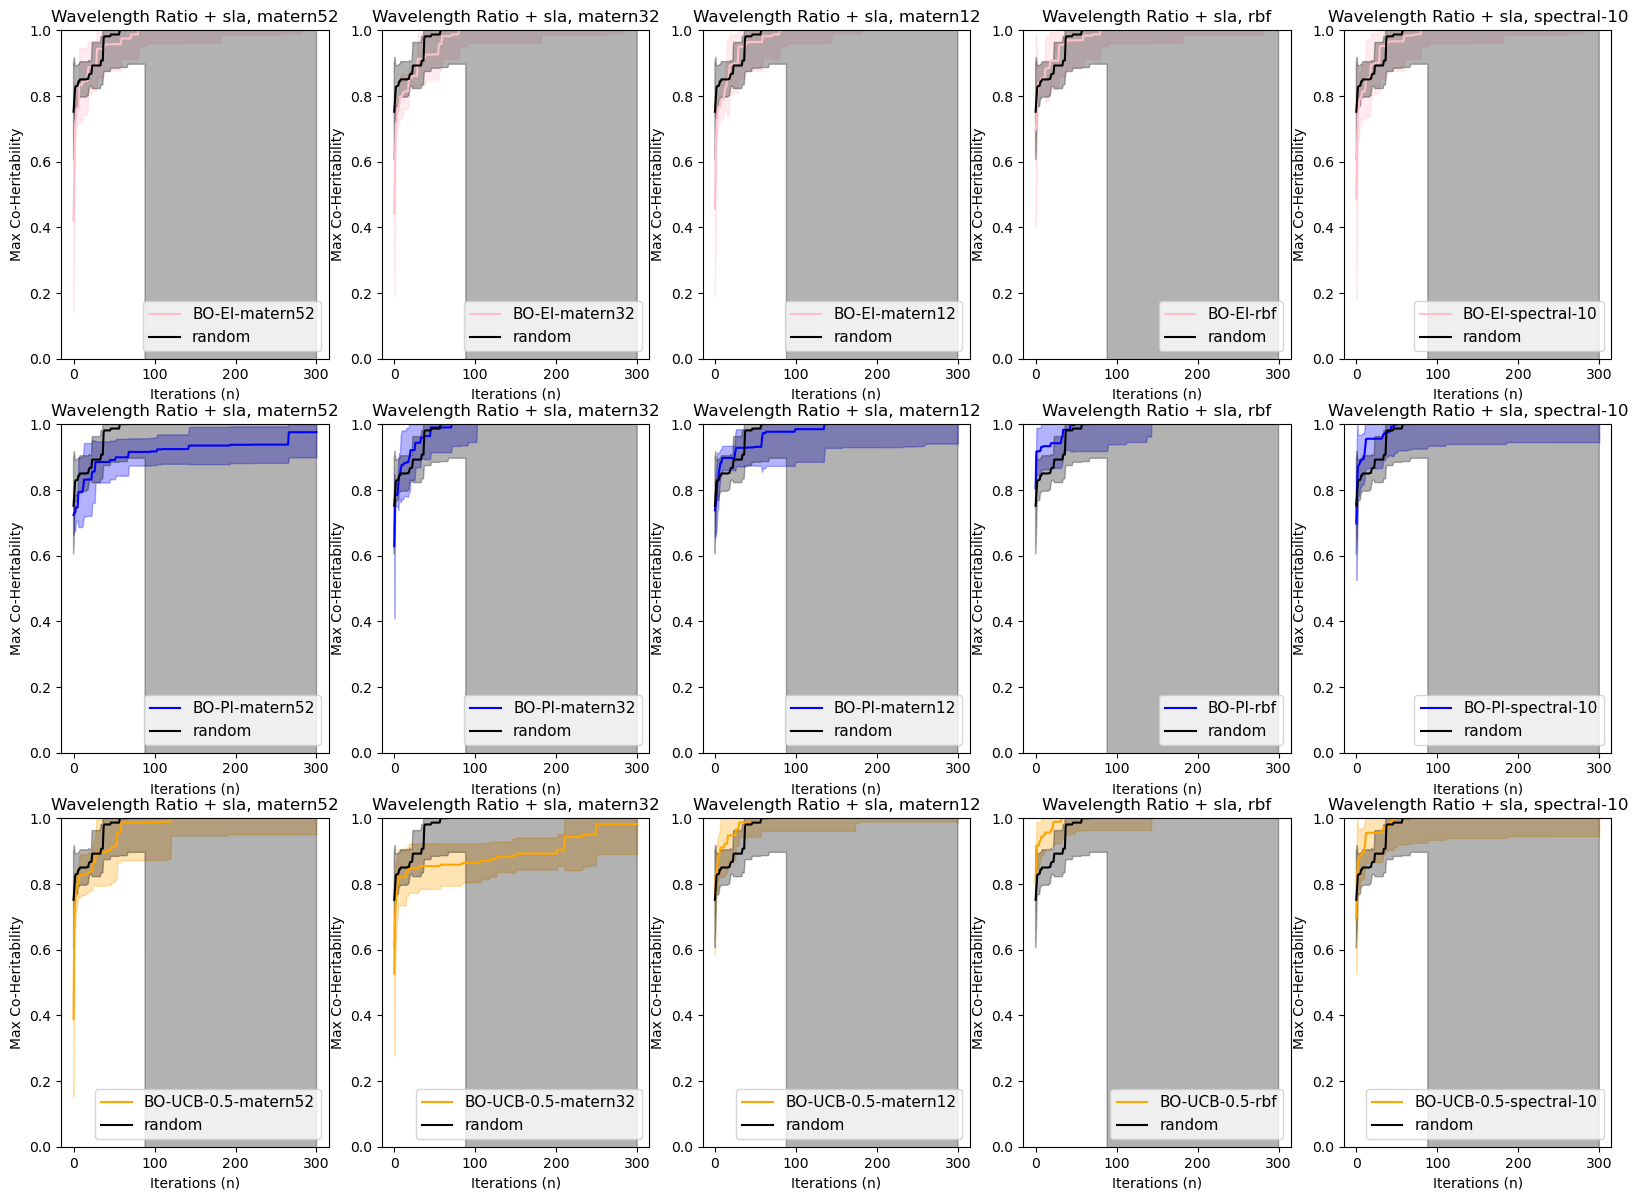

In [34]:
trait = "sla"
alpha = 0.2
seeds = [0,1,2,3,4]

#its = 300 #current maximum iterations i have ran....
#x = np.linspace(0, its, its)

# kernels = ["matern12", "matern12"]#["matern52", "matern32", "matern12", "rbf", "spectral-10"] #, "spectral-4"]
# acqs = ["EI", "EI"] #["EI", "PI", "UCB-0.1", "UCB-0.2", "UCB-0.5"]

kernels = ["matern52", "matern32", "matern12", "rbf", "spectral-10"] #, "spectral-4"]
acqs = ["EI", "PI", "UCB-0.5"]#"UCB-0.1", "UCB-0.2", "UCB-0.5"]

fig, axs = plt.subplots(len(acqs), len(kernels), figsize=(20, 14.5))
color_dict = {"EI": 'Pink', "PI": 'Blue', "KG": 'Green', 
              "UCB": 'Orange', "UCB-0.1": 'Red', "UCB-0.2": 'Green', "UCB-0.5": 'Orange'}

#BAYESIAN OPTIMIZATION
for a, acq_name in enumerate(acqs):
    for k, kernel_name in enumerate(kernels):
        botorch_results = [pd.read_csv(f"./output/{trait}/botorch{acq_name}_{kernel_name}_result_{seed}.npy", encoding='utf-8')["Best"] for seed in seeds]
        botorch_results = [np.array(botorch_results[i]) for i in range(0,len(botorch_results))]
        mean, var = np.mean(botorch_results, axis=0), np.std(botorch_results, axis=0)
        x_axis = np.linspace(0, len(mean), len(mean))

        color = color_dict[acq_name]
        axs[a, k].plot(x_axis, mean, label= f"BO-{acq_name}-{kernel_name}", color=color)
        axs[a, k].fill_between(x_axis, mean - var,  mean + var, alpha=0.3, color=color)
    
        #plot random
        botorch_results = [pd.read_csv(f"./output/{trait}/botorchrandom_result_{seed}.npy", encoding='utf-8')["Best"] for seed in seeds]
        botorch_results = [np.array(botorch_results[i]) for i in range(0,len(botorch_results))]
        mean, var = np.mean(botorch_results, axis=0), np.std(botorch_results, axis=0)
        axs[a, k].plot(x_axis, mean, label= f"random", color="black")
        axs[a, k].fill_between(x_axis, mean - var,  mean + var, alpha=0.3, color="black")

        # #graph elements
        # plt.plot([actual_max[trait]]*its ,linestyle='dashed', label="Best Co-heritabilty")
        # plt.plot ([top_01[trait]]*its ,linestyle='dashed', label="Top 1%")

        axs[a, k].set_title(f"Wavelength Ratio + {trait}, {kernel_name}", fontsize=12)
        axs[a, k].set_xlabel("Iterations (n)", fontsize=10)
        axs[a, k].set_ylabel("Max Co-Heritability", fontsize=10)
        axs[a, k].legend(loc="lower right", fontsize=11)
        axs[a, k].set_ylim(0,1)

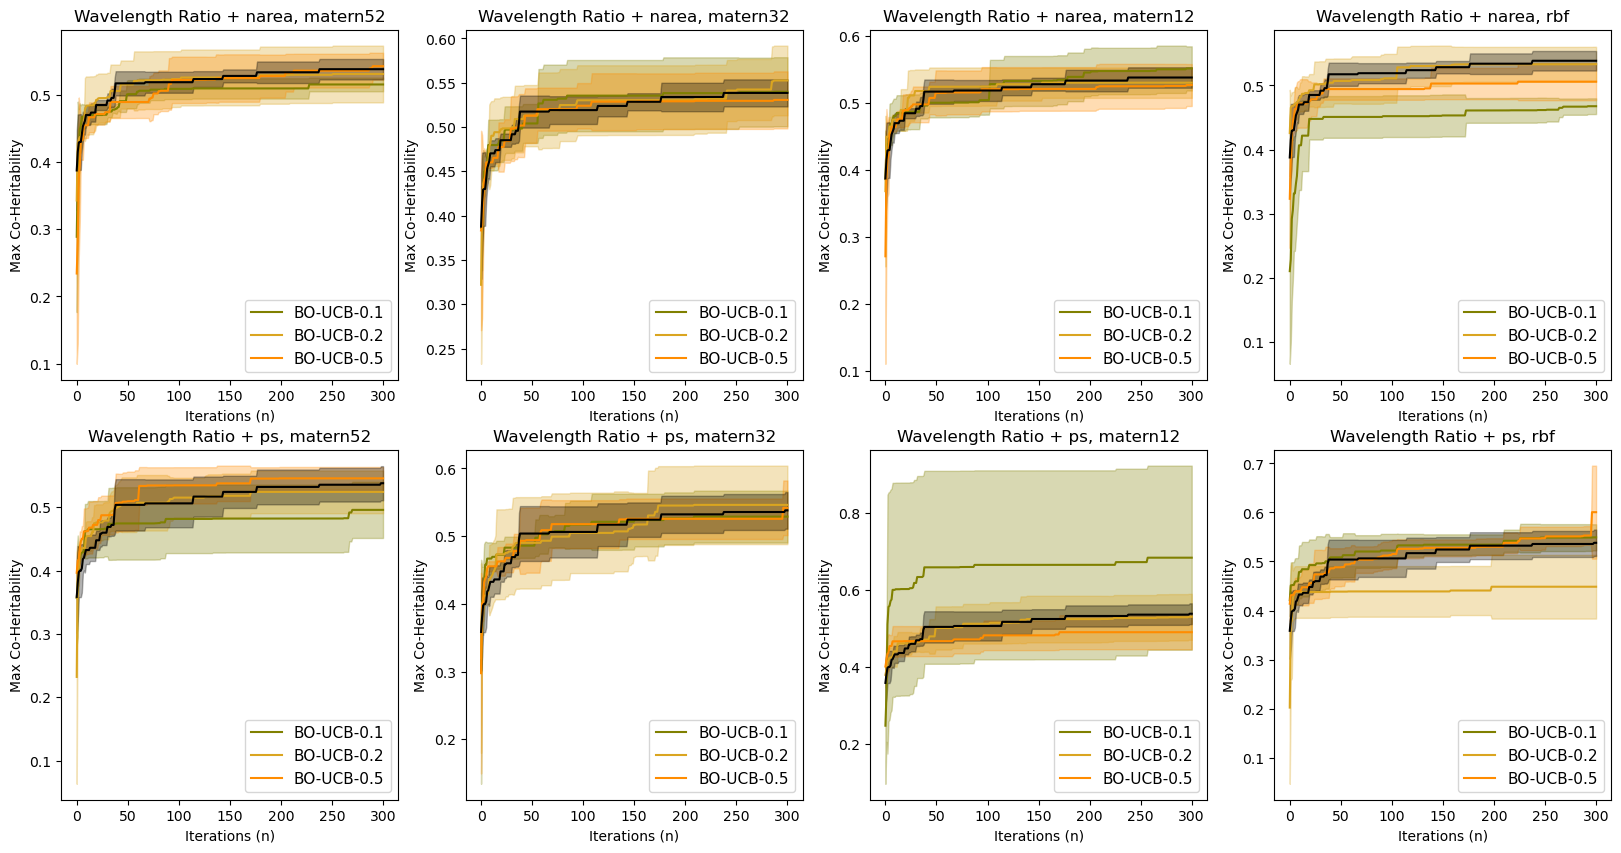

In [8]:
alpha = 0.2
seeds = [0,1,2,3,4]

#its = 300 #current maximum iterations i have ran....
#x = np.linspace(0, its, its)

# kernels = ["matern12", "matern12"]#["matern52", "matern32", "matern12", "rbf", "spectral-10"] #, "spectral-4"]
# acqs = ["EI", "EI"] #["EI", "PI", "UCB-0.1", "UCB-0.2", "UCB-0.5"]

traits = ["narea", "ps"]
kernels = ["matern52", "matern32", "matern12", "rbf"]#, "spectral-10"] #, "spectral-4"]
acqs = ["UCB-0.1", "UCB-0.2", "UCB-0.5"]

fig, axs = plt.subplots(len(traits), len(kernels), figsize=(20, 20//2))
color_dict = {"EI": 'Pink', "PI": 'Blue', "KG": 'Green', 
              "UCB": 'Orange', "UCB-0.1": 'Olive', "UCB-0.2": 'goldenrod', "UCB-0.5": 'darkorange'}

#BAYESIAN OPTIMIZATION
for t, trait in enumerate(traits):
    for k, kernel_name in enumerate(kernels):
        for a, acq_name in enumerate(acqs):
            botorch_results = [pd.read_csv(f"./output/{trait}/botorch{acq_name}_{kernel_name}_result_{seed}.npy", encoding='utf-8')["Best"] for seed in seeds]
            botorch_results = [np.array(botorch_results[i]) for i in range(0,len(botorch_results))]
            mean, var = np.mean(botorch_results, axis=0), np.std(botorch_results, axis=0)
            x_axis = np.linspace(0, len(mean), len(mean))

            color = color_dict[acq_name]
            axs[t, k].plot(x_axis, mean, label= f"BO-{acq_name}", color=color)
            axs[t, k].fill_between(x_axis, mean - var,  mean + var, alpha=0.3, color=color)

            # #graph elements
            # plt.plot([actual_max[trait]]*its ,linestyle='dashed', label="Best Co-heritabilty")
            # plt.plot ([top_01[trait]]*its ,linestyle='dashed', label="Top 1%")

            axs[t, k].set_title(f"Wavelength Ratio + {trait}, {kernel_name}", fontsize=12)
            axs[t, k].set_xlabel("Iterations (n)", fontsize=10)
            axs[t, k].set_ylabel("Max Co-Heritability", fontsize=10)
            axs[t, k].legend(loc="lower right", fontsize=11)
            
        #plot random
        botorch_results = [pd.read_csv(f"./output/{trait}/botorchrandom_result_{seed}.npy", encoding='utf-8')["Best"] for seed in seeds]
        botorch_results = [np.array(botorch_results[i]) for i in range(0,len(botorch_results))]
        mean, var = np.mean(botorch_results, axis=0), np.std(botorch_results, axis=0)
        axs[t, k].plot(x_axis, mean, label= f"random", color="black")
        axs[t, k].fill_between(x_axis, mean - var,  mean + var, alpha=0.3, color="black")


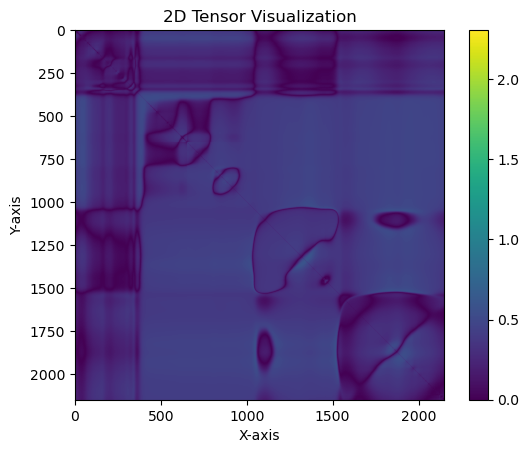

In [37]:
trait = "narea"
path = f"/lfs/turing2/0/ruhana/gptransfer/Benchmark/data/{trait}_coh2.csv"
lookup = pd.read_csv(path, header=0)

lookup_tensor = torch.tensor(lookup.values, dtype=torch.float64)
no_nan_lookup = torch.nan_to_num(lookup_tensor)

plt.imshow(no_nan_lookup, cmap='viridis')
plt.colorbar()
plt.title('2D Tensor Visualization')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

#should i just remove all values above 2?

In [36]:
no_nan_lookup

tensor([[  0.0000,   0.0000,   0.0000,  ...,   0.4084,   0.4113,   0.4099],
        [  0.0000,   0.0000,   0.1989,  ...,   0.4021,   0.4048,   0.4033],
        [  0.0000, 114.6771,   0.0000,  ...,   0.3888,   0.3911,   0.3895],
        ...,
        [  0.4164,   0.4107,   0.3998,  ...,   0.0000,   0.0000,   0.0000],
        [  0.4192,   0.4131,   0.4018,  ...,   0.0000,   0.0000,   0.5368],
        [  0.4183,   0.4122,   0.4007,  ...,   0.0000,   0.5416,   0.0000]],
       dtype=torch.float64)